In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('final_gaussian_scales.json', 'r') as f:
    data = json.load(f)

ids = [entry['id'] for entry in data]
scale_x = [entry['scale_x'] for entry in data]
scale_y = [entry['scale_y'] for entry in data]
alpha = [entry['alpha'] for entry in data]

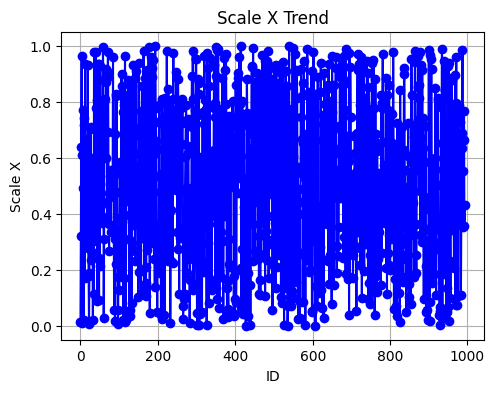

In [3]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ids, scale_x, marker='o', color='blue')
plt.title('Scale X Trend')
plt.xlabel('ID')
plt.ylabel('Scale X')
plt.grid(True)

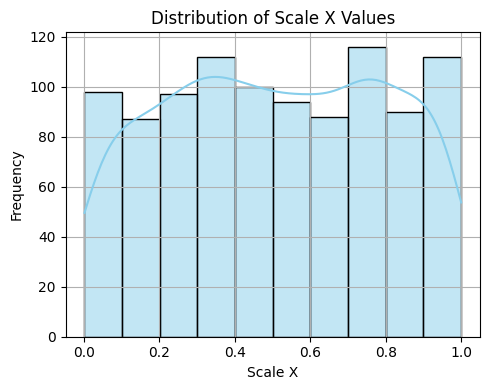

In [4]:
plt.figure(figsize=(5, 4))
sns.histplot(scale_x, bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Scale X Values')
plt.xlabel('Scale X')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

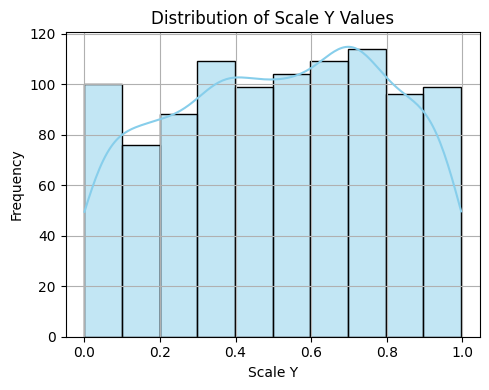

In [5]:
plt.figure(figsize=(5, 4))
sns.histplot(scale_y, bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Scale Y Values')
plt.xlabel('Scale Y')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

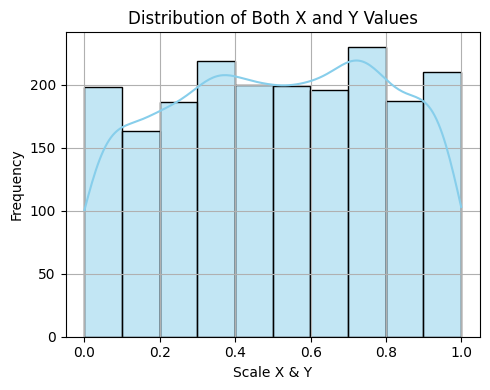

In [6]:
both_scales = scale_x  + scale_y
plt.figure(figsize=(5, 4))
sns.histplot(both_scales, bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Both X and Y Values')
plt.xlabel('Scale X & Y')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

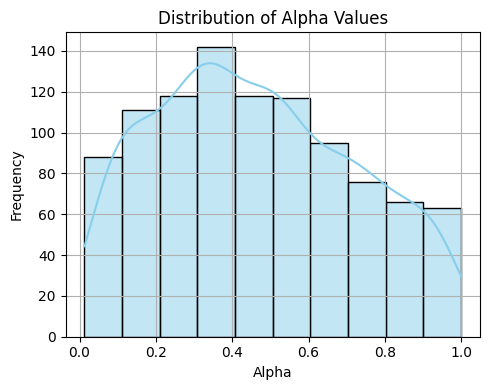

In [7]:
plt.figure(figsize=(5, 4))
sns.histplot(alpha, bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

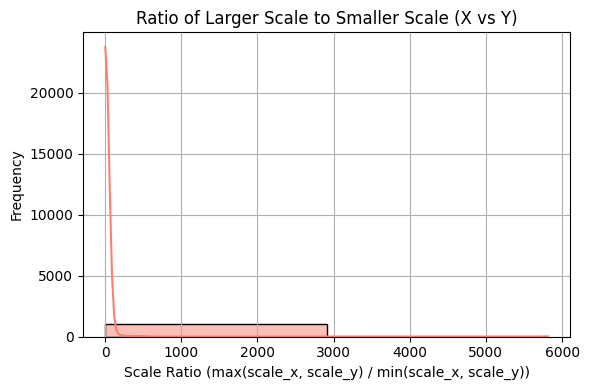

In [ ]:
scale_ratios = []
for entry in data:
    x = entry['scale_x']
    y = entry['scale_y']
    if min(x, y) != 0:  # avoid division by zero
        scale_ratios.append(max(x, y) / min(x, y))
    else:
        scale_ratios.append(float('inf'))  # or skip, or handle as needed

# Plot the distribution of the scale ratios
plt.figure(figsize=(6, 4))
sns.histplot(scale_ratios, bins=2, kde=True, color='salmon', edgecolor='black')

plt.title('Ratio of Larger Scale to Smaller Scale (X vs Y)')
plt.xlabel('Scale Ratio (max(scale_x, scale_y) / min(scale_x, scale_y))')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

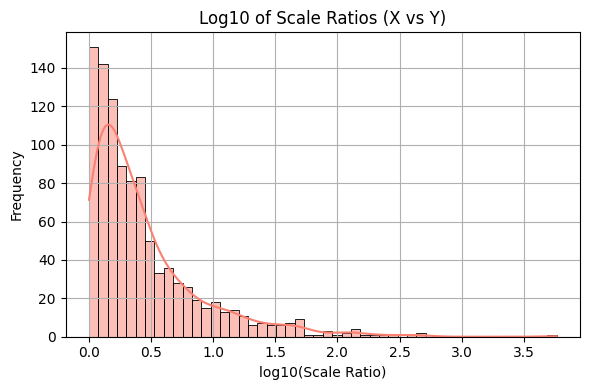

In [6]:
import numpy as np
clean_ratios = [r for r in scale_ratios if np.isfinite(r) and r > 0]

# Apply log10 transformation
log_ratios = np.log10(clean_ratios)

plt.figure(figsize=(6, 4))
sns.histplot(log_ratios, bins=50, kde=True, color='salmon', edgecolor='black')

plt.title('Log10 of Scale Ratios (X vs Y)')
plt.xlabel('log10(Scale Ratio)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

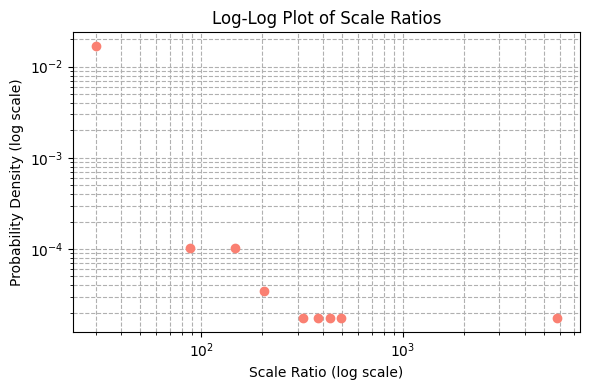

In [7]:
# Clean your scale_ratios list (remove infs and zeros)
clean_ratios = [r for r in scale_ratios if np.isfinite(r) and r > 0]

# Compute histogram (density=True gives PDF estimate)
counts, bin_edges = np.histogram(clean_ratios, bins=100, density=True)

# Calculate bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Remove zero counts (log(0) is undefined)
nonzero = counts > 0
counts = counts[nonzero]
bin_centers = bin_centers[nonzero]

# Plot log-log
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, counts, marker='o', linestyle='none', color='salmon')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Scale Ratio (log scale)')
plt.ylabel('Probability Density (log scale)')
plt.title('Log-Log Plot of Scale Ratios')
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()

In [5]:
top_ratios = sorted(scale_ratios, reverse=True)
for i, ratio in enumerate(top_ratios[:50], 1):
    print(f"{ratio:.4f}")

5813.0315
490.5384
432.4206
377.1092
293.9719
225.0243
211.6285
153.8170
146.6476
130.5255
128.8511
128.4996
126.9823
116.3396
102.0249
88.2583
85.8764
78.6096
68.2882
56.4157
53.9338
52.5773
52.0831
50.5639
50.1517
48.6220
48.6006
48.5751
47.5590
45.0999
43.9396
43.2842
41.9897
41.7813
41.4083
38.4417
37.6637
35.5739
34.2584
33.6059
32.8407
32.1487
30.8696
30.8140
30.2756
28.4471
27.9163
27.8006
26.6115
25.7345
